# Making predictions with exponential smoothing

## Level

$$
\hat{x}_{n+1} = \alpha x_n + (1-\alpha)\hat{x}_n
$$

You can also think of it as yesterday’s forecast plus a constant times the error in yesterday’s forecast.

$$
\hat{x}_{n+1} = \hat{x}_n + \alpha(x_n - \hat{x}_n) \\
l_n = \alpha x_n + (1 - \alpha)\hat{x}_n \\
\hat{x}_{n+1} = l_n
$$

we could think of SES (Simple Exponential Smoothing) as creating a forecast value at step n+1 as simply the smoothed value available at step n.

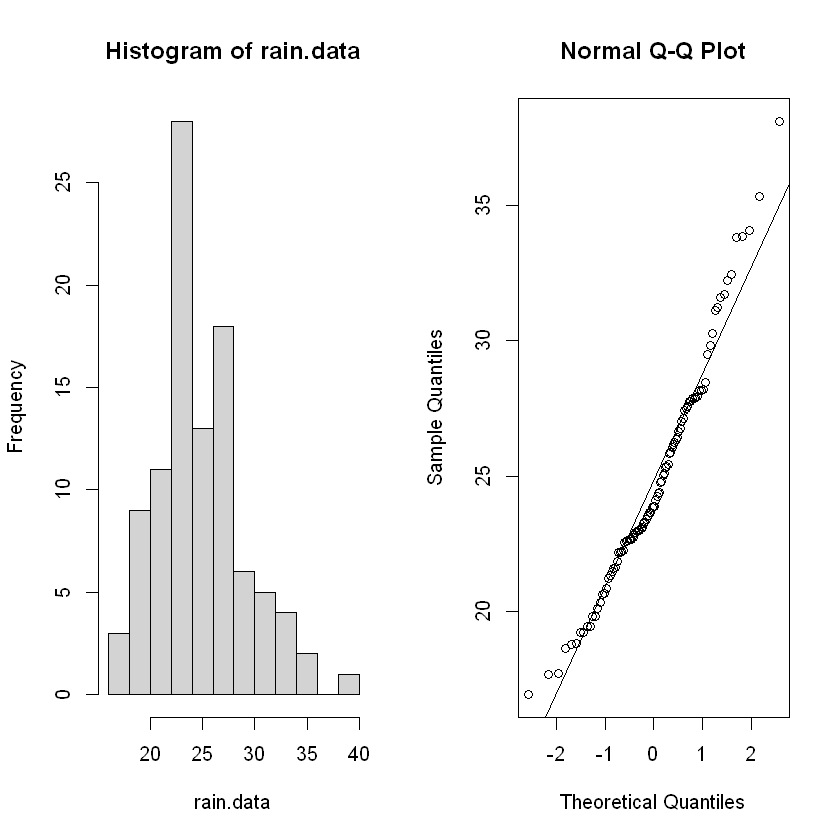

In [7]:
rain.data = scan('https://robjhyndman.com/tsdldata/hurst/precip1.dat',skip=1)
rain.ts = ts(rain.data, start=c(1813))
par(mfrow=c(1,2))
hist(rain.data)
qqnorm(rain.data)
qqline(rain.data)

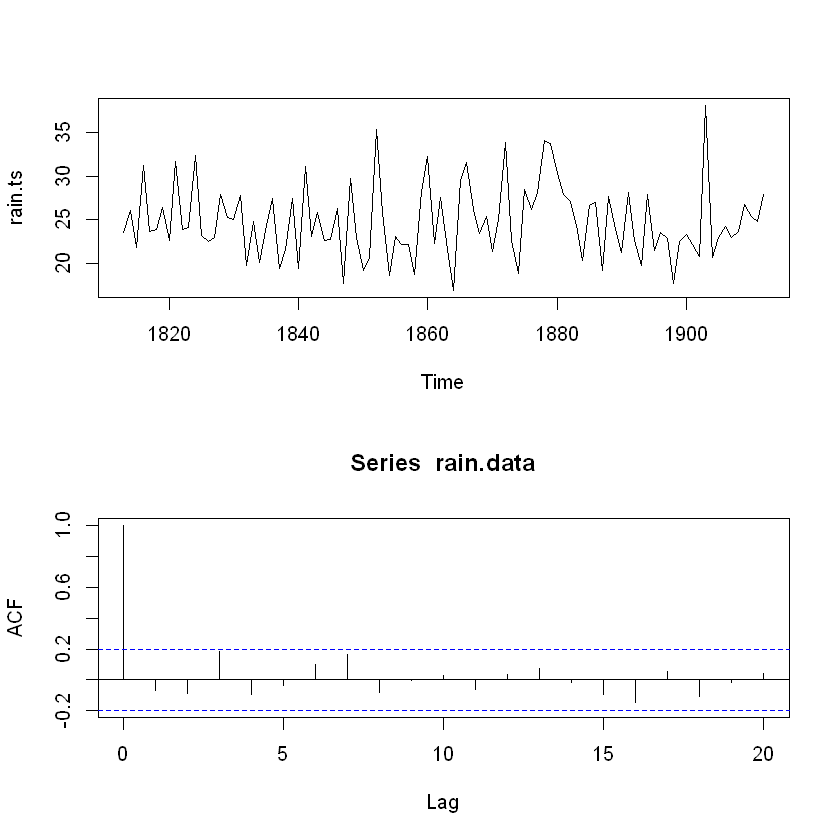

In [8]:
par(mfrow=c(2,1))
plot(rain.ts)
acf(rain.data)

it looks like just noise.

In [9]:
library(forecast)
auto.arima(rain.ts)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Series: rain.ts 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
         mean
      24.8239
s.e.   0.4193

sigma^2 estimated as 17.76:  log likelihood=-285.25
AIC=574.49   AICc=574.61   BIC=579.7

It looks like our model is just $\mu=24.8$.

In [19]:
alpha = .2
forecast.values = NULL

n = length(rain.data)
# naive first forecast
forecast.values[1] = rain.data[1]
for (i in 1:n) {
    forecast.values[i+1] = alpha * rain.data[i] + (1 - alpha)*forecast.values[i]
}

paste("forecast for time", n+1,"=",forecast.values[n+1])

[1] "forecast for time 101 = 25.3094062064236"

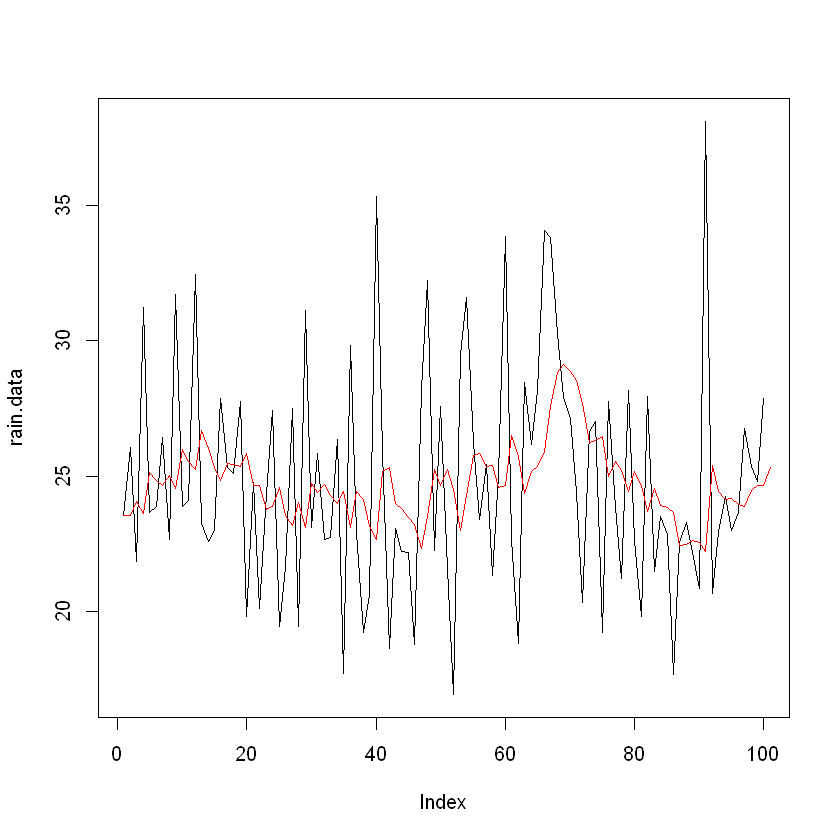

In [20]:
plot(rain.data, type='l')
lines(forecast.values, col='red')

What is the most optimal $\alpha$ value in this case? This can be done by trying different $\alpha$ values and measure a sum of squared errors (SSE) of $\epsilon = (\text{forecast} - \text{actual})^2$.

In [16]:
HoltWinters(rain.ts, beta=F, gamma=F)

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = rain.ts, beta = F, gamma = F)

Smoothing parameters:
 alpha: 0.02412151
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 24.67819

## Trend

$$
\hat{x}_{n+1} = l_n + t_n \\
l_n = \alpha x_n + (1-\alpha)(l_{n-1} + t_{n-1}) \\
t_n = \beta (l_n - l_{n-1}) + (1 + \beta)t_{n-1}
$$